In [3]:
import pandas as pd


In [18]:
pip install openpyxl

     |████████████████████████████████| 249 kB 2.9 MB/s            
You should consider upgrading via the '/Users/mukherjeeworldwide/Desktop/PERSONAL/CODING/PYTHON/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [149]:
#Read it in a DataFrame
oo = pd.read_excel("../../DATA_SCIENCE/data_set/im/Delivered_Drivers_2022-2023.xlsx",skiprows=1)
 

In [46]:
oo.head(5)

,DriverName,Type,PolarionID,Title,ResellerName,CreatedDate,ApprovedDate,StartDate,DeliveryDate,ResolvedDate,Resolution,VersionIntroduced
0,inpdmsaa,Inquiry,IM-63470,DDR - Inpeco DMS Automation to support aliquot...,Abbott,2018-12-20,2022-06-09,2022-06-09,2022-06-30,NaN,NaN,NaN
1,diiqcbrq,Inquiry,IM-65235,The QC Bracketing Driver needs to display the ...,DI,2019-03-15,2022-08-09,2022-08-09,2022-08-16,NaN,NaN,NaN
2,sebphrsi,Inquiry,IM-67975,Add support for additional testcode/result com...,SEBIA Phoresis,2019-06-26,2022-05-16,2022-05-16,2022-05-16,NaN,NaN,NaN
3,aghusqll,Inquiry,IM-69969,NDR AGHU LIS,AGHU,2019-09-12,2020-03-31,2023-06-19,2023-09-22,NaN,2023-09-22 15:30,NaN
4,hampipei,Inquiry,IM-79002,hampipei - Update the driver to no longer use ...,NaN,2020-04-22,2020-04-30,2022-03-31,2022-04-22,NaN,NaN,NaN


In [45]:
oo.Type.value_counts()

Type
Inquiry        255
Known Issue     82
Name: count, dtype: int64

In [5]:
oo = pd.read_excel("../../DATA_SCIENCE/jupyter_notebooks/output.xlsx",skiprows=1)

oo[['ApprovedDate','DeliveryDate']] = oo[['ApprovedDate','DeliveryDate']].apply(pd.to_datetime)
oo['NumberOfDays'] = (oo['DeliveryDate'] - oo['ApprovedDate'])


oo=oo[['DriverName','Type','CreatedDate','ApprovedDate','DeliveryDate', 'NumberOfDays','Title']]
#oo=oo.sort_values(by='NumberOfDays', ascending=False)

duplicates = oo[oo.duplicated('DriverName')]
oo=duplicates.sort_values(by=['DriverName', 'Type','CreatedDate'])
oo
#oo=oo[['DriverName','Type']].size()

#oo.to_csv('output1.csv')
#g= oo.groupby(['DriverName','Type']).agg({'DriverName':['count']})
#g.to_csv('output1.csv')


,DriverName,Type,CreatedDate,ApprovedDate,DeliveryDate,NumberOfDays,Title
1,abdalmpi,Inquiry,2023-09-01,2023-09-08,2023-10-04,26 days,abdalmpi - enhancements requested
4,abdicqii,Inquiry,2022-11-29,2023-03-28,2023-04-17,20 days,DDR abdicqii - parse control name for QC
5,abdicqii,Inquiry,2023-04-24,2023-04-28,2023-06-23,56 days,DDR abdicqii - check for orders every second d...
6,abdicqii,Known Issue,2023-02-17,NaT,2023-03-30,NaT,abdicqii - Status messages are queued with no ...
9,abimulti,Inquiry,2023-09-25,2023-10-05,2023-12-22,78 days,DDR - abimulti Enhancement Requests
...,...,...,...,...,...,...,...
129,sysct90i,Inquiry,2023-08-11,2023-09-01,2023-09-01,0 days,sysct90i - Additional changes for Healius pt.2
130,sysct90i,Inquiry,2023-09-26,2023-10-12,2023-11-09,28 days,sysct90i - Additional changes for Healius - UI...
132,sysrouta,Inquiry,2022-08-31,2022-10-13,2022-11-28,46 days,DDR sysrouta - STA.5 usable in Rules
133,sysrouta,Inquiry,2023-03-31,2023-06-13,2023-06-20,7 days,DDR sysrouta - support aliquot order


0       21 days
1        7 days
2        0 days
3     1270 days
4      722 days
         ...   
332     14 days
333         NaT
334         NaT
335         NaT
336     19 days
Name: C, Length: 337, dtype: timedelta64[ns]

In [137]:
g.size().unstack(['Type'], fill_value=0).plot()


TypeError: 'numpy.int64' object is not callable

In [28]:
oo = pd.read_excel("../../DATA_SCIENCE/jupyter_notebooks/output.xlsx",skiprows=1)

oo[['CreatedDate','ApprovedDate','DeliveryDate']] = oo[['CreatedDate','ApprovedDate','DeliveryDate']].apply(pd.to_datetime)
import numpy as np
oo['NumberOfDays'] = np.where (oo['Type'] == 'Known Issue', (oo['DeliveryDate'] - oo['CreatedDate']) ,(oo['DeliveryDate'] - oo['ApprovedDate'])) 

df1 = oo[oo['Type']=='Inquiry']
 

#copy into a new df
newdf = df1[['DriverName', 'NumberOfDays']].copy() 


newdf= newdf.head(10)
newdf

 





,DriverName,NumberOfDays
0,abdalmpi,6 days
1,abdalmpi,26 days
2,abdgtwma,2 days
3,abdicqii,14 days
4,abdicqii,20 days
5,abdicqii,56 days
7,abdinfoi,18 days
8,abimulti,20 days
9,abimulti,78 days
12,bdcectri,108 days


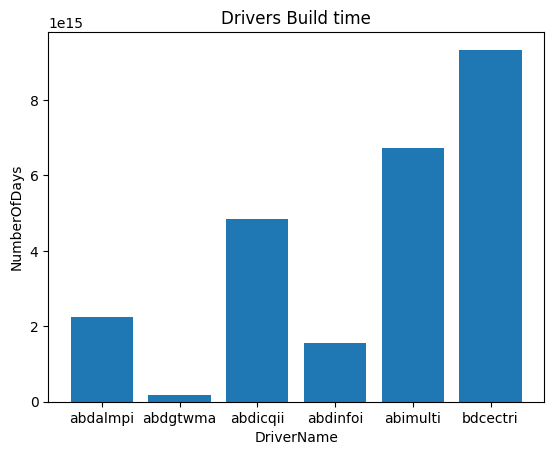

In [46]:

df = newdf.head(10) 

import matplotlib.pyplot as plt

plt.bar(df['DriverName'], df['NumberOfDays'])

    

plt.xlabel('DriverName')
plt.ylabel('NumberOfDays')
plt.title('Drivers Build time') 

plt.show()


In [5]:
oo = pd.read_csv("../../DATA_SCIENCE/jupyter_notebooks/output.csv",skiprows=0)
oo


,Unnamed: 0,Unnamed: 1,DriverName,Type,CreatedDate,ApprovedDate,DeliveryDate,NumberOfDays,Title
0,NaN,0,abdalmpi,Inquiry,2023-07-20 00:00:00,2023-07-26 00:00:00,2023-08-01 00:00:00,6,abdalmpi - Changes based on testing feedback
1,0.0,1,abdalmpi,Inquiry,2023-09-01,2023-09-08,2023-10-04,26,abdalmpi - enhancements requested
2,1.0,2,abdgtwma,Inquiry,2023-03-03,2023-04-19,2023-04-21,2,Abbott GLP TWM - orderTestStatus messages for ...
3,2.0,3,abdicqii,Inquiry,2022-02-15,2022-03-31,2022-04-14,14,DDR for abdicqii
4,3.0,4,abdicqii,Inquiry,2022-11-29,2023-03-28,2023-04-17,20,DDR abdicqii - parse control name for QC
...,...,...,...,...,...,...,...,...,...
133,132.0,133,sysrouta,Inquiry,2023-03-31,2023-06-13,2023-06-20,7,DDR sysrouta - support aliquot order
134,133.0,134,sysxnsai,Known Issue,2023-08-22,NaN,2023-12-30,130,Error in parse - <SUBSCRIPT>getreptype+3^sysxn...
135,134.0,135,tcahl7aa,Inquiry,2023-04-12,2023-04-25,2023-05-18,23,tcahl7aa - Improvements for Diasorin
136,135.0,136,tcahl7aa,Known Issue,2023-08-24,NaN,2023-09-01,8,Test priority takes over load balancing for in...


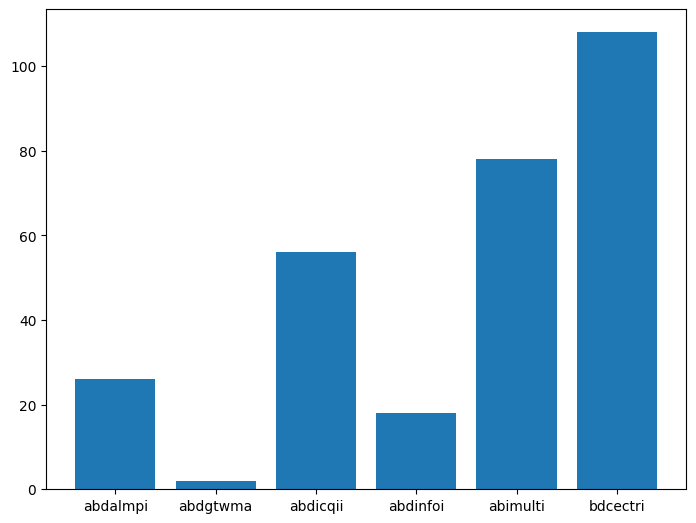

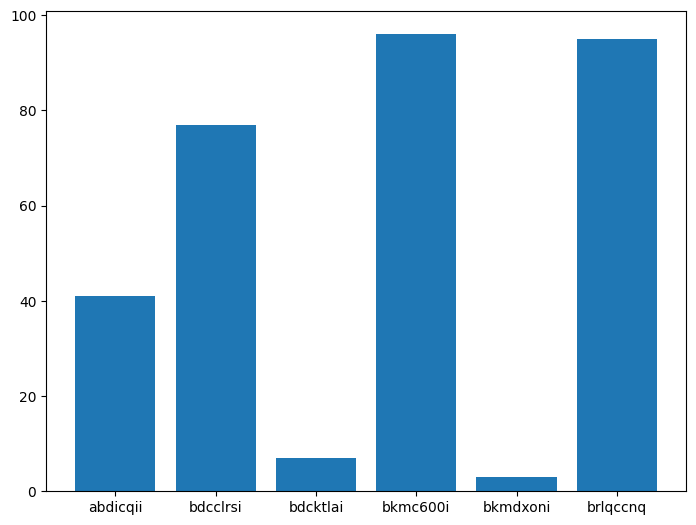

In [11]:

#oo[['CreatedDate','ApprovedDate','DeliveryDate']] = oo[['CreatedDate','ApprovedDate','DeliveryDate']].apply(pd.to_datetime)
#import numpy as np
#oo['NumberOfDays'] = np.where (oo['Type'] == 'Known Issue', (oo['DeliveryDate'] - oo['CreatedDate']) ,(oo['DeliveryDate'] - oo['ApprovedDate'])) 

df1 = oo[oo['Type']=='Inquiry']
df2 = oo[oo['Type']=='Known Issue']
 

#copy into a new df
newdf_inquiry = df1[['DriverName', 'NumberOfDays']].copy() 
df_inquiry= newdf_inquiry.head(10)

newdf_KI = df2[['DriverName', 'NumberOfDays']].copy() 
df_KI= newdf_KI.head(10)

#=====
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_inquiry['DriverName'], df_inquiry['NumberOfDays']) 
plt.show()

#=====

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_KI['DriverName'], df_KI['NumberOfDays'])
plt.show()

In [85]:


oo = pd.read_excel("../../DATA_SCIENCE/jupyter_notebooks/output.xlsx",skiprows=1)

#oo[['CreatedDate','ApprovedDate','DeliveryDate']] = oo[['CreatedDate','ApprovedDate','DeliveryDate']].apply(pd.to_datetime)
#import numpy as np

#oo['NumberOfDays'] = np.where (oo['Type'] == 'Known Issue', (oo['DeliveryDate'] - oo['CreatedDate']) ,(oo['DeliveryDate'] - oo['ApprovedDate']))

oo
#oo.to_excel('output.xlsx')
#oo.to_csv('output.csv')
#df1 = oo[oo['Type']=='Inquiry' & oo['NumberOfDays'] > 30]

#df1.to_numpy()[0][5]

In [28]:

oo = pd.read_csv("../../DATA_SCIENCE/jupyter_notebooks/output.csv",skiprows=0)

import matplotlib.pyplot as plt
known_issues_oo = oo[oo['Type']=='Known Issue'].head(5)
inquiries_oo= oo[oo['Type']=='Inquiry'] .head(5)

known_issues = known_issues_oo
driver_name = oo[oo['DriverName']].head(5)


grades_range.to_numpy()
boys_grades.to_numpy()
girls_grades.to_numpy()


fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(grades_range, girls_grades, color='r')
ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Grades Range')
ax.set_ylabel('Grades Scored')
ax.set_title('scatter plot')
plt.show()








KeyError: "None of [Index(['abdalmpi', 'abdalmpi', 'abdgtwma', 'abdicqii', 'abdicqii', 'abdicqii',\n       'abdicqii', 'abdinfoi', 'abimulti', 'abimulti',\n       ...\n       'sysct90i', 'sysct90i', 'sysct90i', 'sysrouta', 'sysrouta', 'sysrouta',\n       'sysxnsai', 'tcahl7aa', 'tcahl7aa', 'tfclblkq'],\n      dtype='object', length=138)] are in the [columns]"